In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
tesla=pd.read_csv("Tesla.csv")
tesla.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,29-06-2010,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,30-06-2010,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,01-07-2010,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,02-07-2010,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,06-07-2010,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,07-07-2010,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,08-07-2010,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,09-07-2010,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,12-07-2010,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,13-07-2010,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [3]:
tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2193 non-null   object 
 1   Open       2193 non-null   float64
 2   High       2193 non-null   float64
 3   Low        2193 non-null   float64
 4   Close      2193 non-null   float64
 5   Adj Close  2193 non-null   float64
 6   Volume     2193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 120.1+ KB


In [5]:
tesla['Date']=pd.to_datetime(tesla['Date'])

In [6]:
#EDA

In [7]:
print(f'stock Price {tesla.Date.min()} {tesla.Date.max()}')
print(f'Tot days={(tesla.Date.max() - tesla.Date.min()).days} days')

stock Price 2010-01-07 00:00:00 2019-12-03 00:00:00
Tot days=3617 days


In [8]:
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2193.000000,2193.000000,2193.000000,2193.000000,2193.000000,2.193000e+03
mean,175.652882,178.710262,172.412075,175.648555,175.648555,5.077449e+06
std,115.580903,117.370092,113.654794,115.580771,115.580771,4.545398e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,33.110001,33.910000,32.459999,33.160000,33.160000,1.577800e+06
50%,204.990005,208.160004,201.669998,204.990005,204.990005,4.171700e+06
75%,262.000000,265.329987,256.209991,261.739990,261.739990,6.885600e+06
max,386.690002,389.609985,379.350006,385.000000,385.000000,3.716390e+07


In [23]:
tesla.isnull().sum().sum()

0

In [24]:
tesla.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

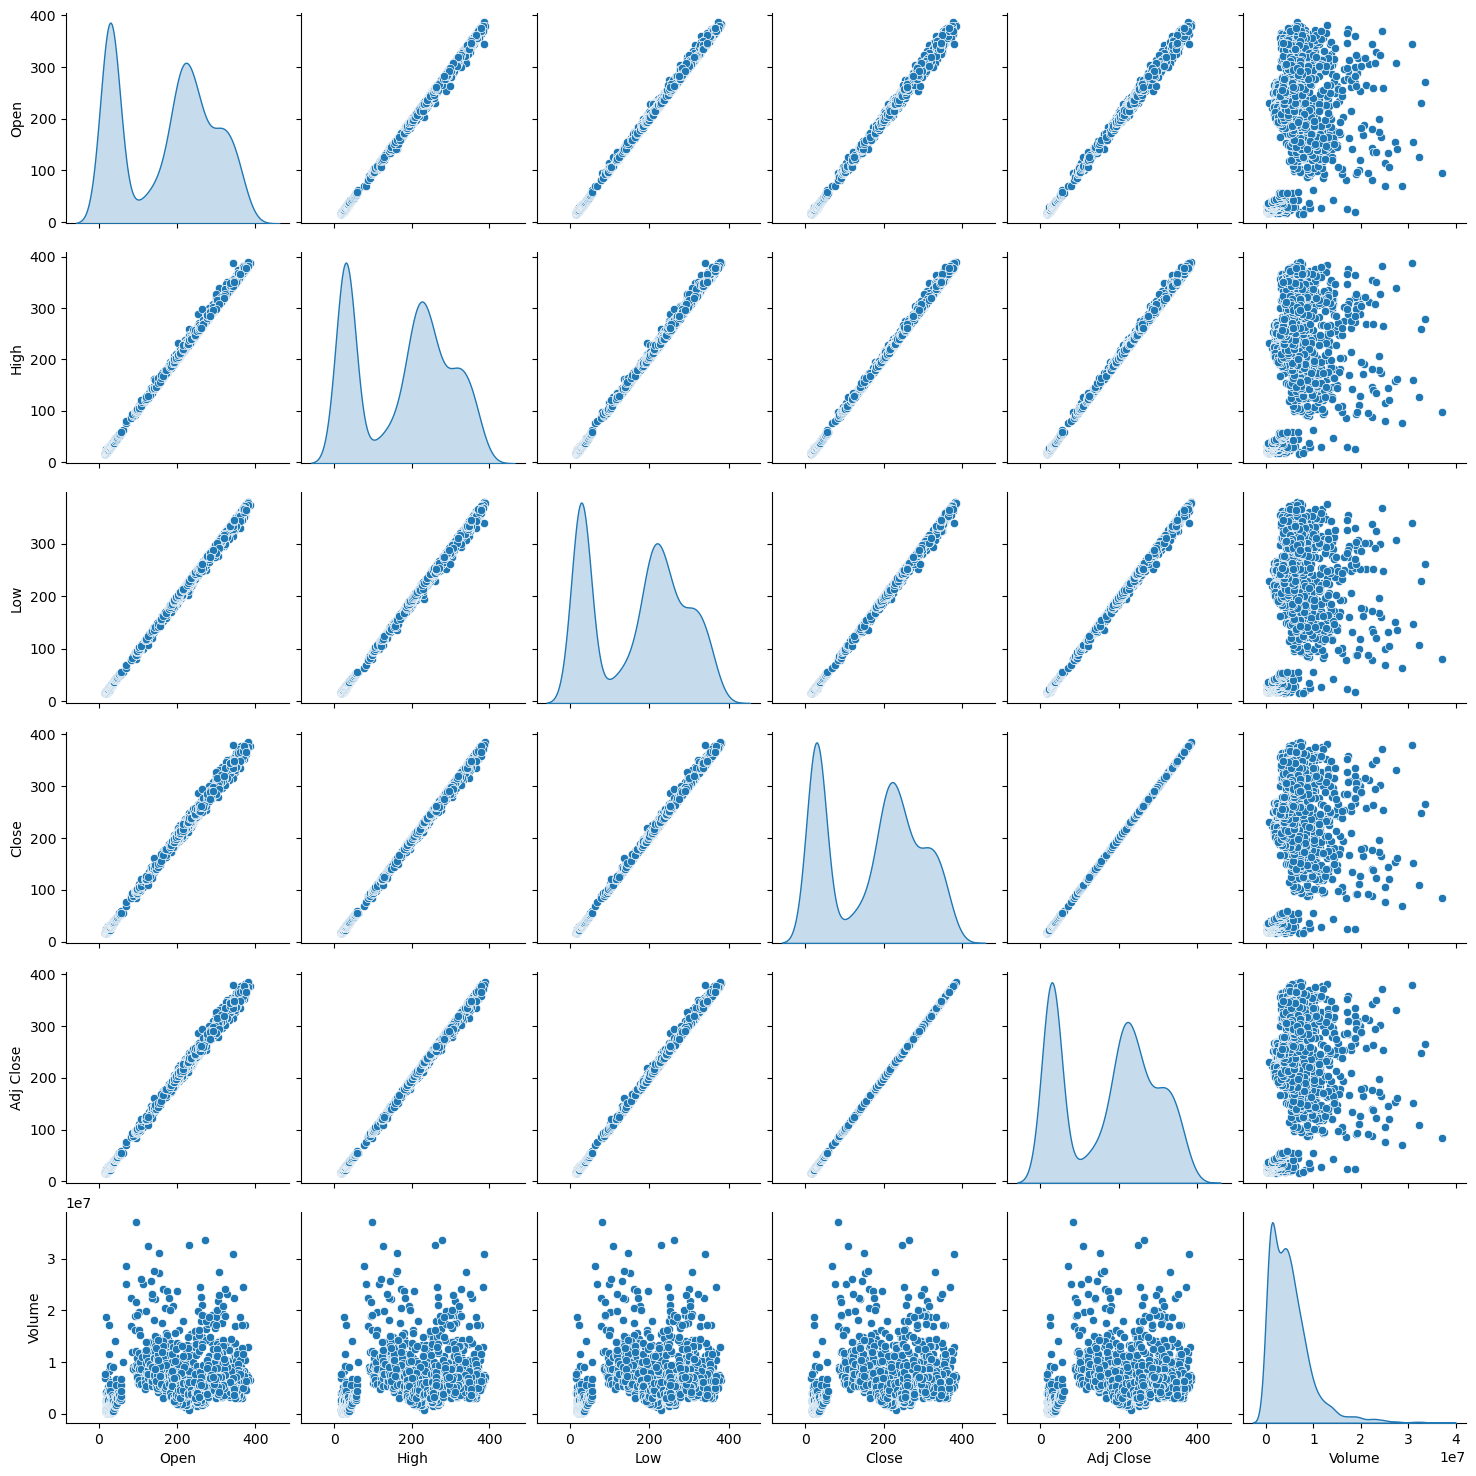

In [9]:
sns.pairplot(data=tesla,diag_kind='kde')

Text(0.5, 1.0, 'Stock Price')

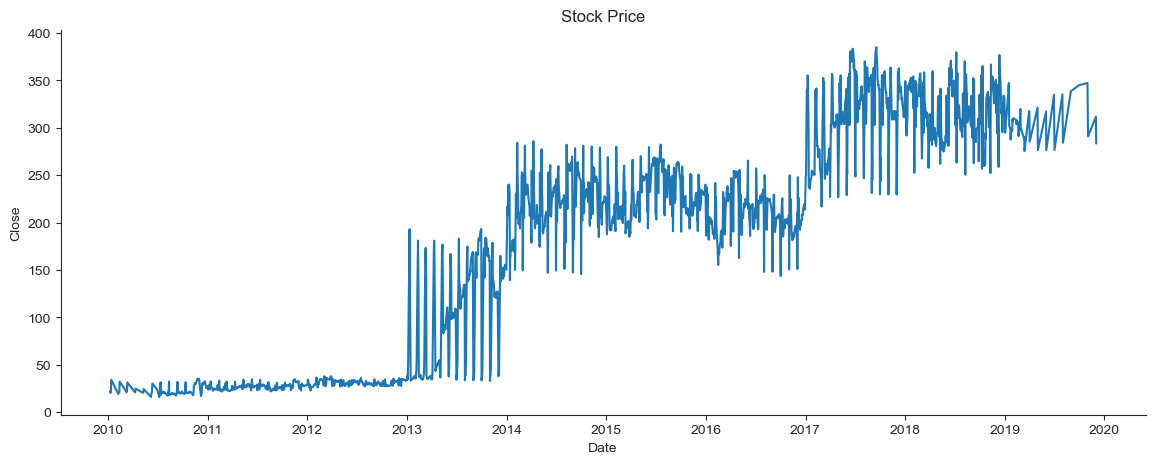

In [20]:
plt.figure(figsize=(14,5))
sns.set_style("ticks")
sns.lineplot(data=tesla,x="Date",y="Close")
sns.despine()
plt.title("Stock Price")

In [21]:
#Regression Building


In [25]:
x=np.array(tesla.index).reshape(-1,1)
y=tesla['Close']

In [26]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,random_state=101)

In [52]:
x_train

array([[2084],
       [1887],
       [ 500],
       ...,
       [1361],
       [1547],
       [ 863]], dtype=int64)

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
scale=StandardScaler()
scale.fit_transform(x_train)

array([[ 1.52363376],
       [ 1.2157162 ],
       [-0.95221103],
       ...,
       [ 0.39356067],
       [ 0.68428487],
       [-0.38482993]])

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
y_pred=lr.predict(x_test)
y_pred

array([144.62013242, 183.10150437, 221.75314787, ..., 242.69654941,
       151.94180938,  94.39002302])

In [58]:
print(lr.coef_)

[0.17027156]


In [59]:
print(lr.intercept_)

-12.88105806077121


In [62]:
dfr=pd.DataFrame({'Actual close':y_test,'predict close':y_pred})
dfr.head(10)

,Actual close,predict close
925,254.839996,144.620132
1151,206.550003,183.101504
1378,233.389999,221.753148
2079,310.700012,341.113510
762,122.269997,116.865869
330,28.340000,43.308556
254,29.129999,30.367917
900,169.619995,140.363343
1328,231.960007,213.239570
1440,232.740005,232.309984


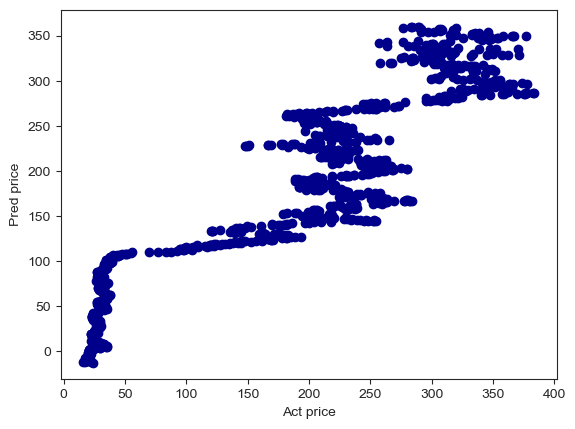

In [69]:
plt.scatter(data=dfr,x='Actual close',y='predict close',color='darkblue')
plt.xlabel("Act price")
plt.ylabel("Pred price")
plt.show()

In [78]:
from sklearn.metrics import r2_score

In [83]:
#ACCURACY SCORE
acc=r2_score(y_test,y_pred)
acc*100

85.95623126840658

<AxesSubplot:xlabel='Close'>

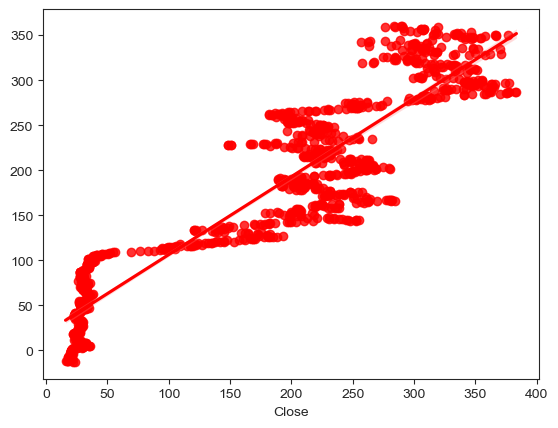

In [82]:
sns.regplot(data=tesla,x=y_test,y=y_pred,color='red')